In [2]:
import pandas as pd

df_chats = pd.read_csv('cleaned_data/chats_final_with_clusters.csv')

print(df_chats.columns)

Index(['id', 'client_id', 'question', 'answer', 'created_at', 'updated_at',
       'bot_id', 'type', 'image_url', 'audio_url', 'has_image', 'has_audio',
       'sentiment', 'sentiment_score', 'satisfaction', 'cleaned_question',
       'cluster'],
      dtype='object')


In [3]:
# aggregate metrics per cluster
topic_perf = (
    df_chats.groupby('cluster')
    .agg({
        "id": "count",
        "sentiment_score": "mean",
        "satisfaction": "mean"
    })
    .rename(columns={
        "id": "message_count",
        "sentiment_score": "avg_sentiment",
        "satisfaction": "avg_satisfaction"\
    })
    .reset_index()
)

In [5]:
# Round values for better readability
topic_perf[["avg_sentiment", "avg_satisfaction"]] = topic_perf[["avg_sentiment", "avg_satisfaction"]].round(3)

topic_perf

,cluster,message_count,avg_sentiment,avg_satisfaction
0,0,9913,0.746,0.075
1,1,545,0.478,0.004
2,2,447,0.535,0.002
3,3,23,0.731,0.174
4,4,93,0.863,0.516


In [6]:
# Generate Recommendations Automatically
def generate_recommendation(row):
    if row["message_count"] > 1000 and row["avg_satisfaction"] < 0.1:
        return "High volume, low satisfaction → Improve chatbot responses for this topic"
    elif row["avg_satisfaction"] >= 0.4:
        return "High satisfaction → Keep current responses"
    elif row["avg_satisfaction"] < 0.1 and row["avg_sentiment"] < 0.6:
        return "Low sentiment & satisfaction → Review responses or escalate to human agent"
    else:
        return "Moderate performance → Monitor and improve gradually"

topic_perf["recommendation"] = topic_perf.apply(generate_recommendation, axis=1)
topic_perf

,cluster,message_count,avg_sentiment,avg_satisfaction,recommendation
0,0,9913,0.746,0.075,"High volume, low satisfaction → Improve chatbo..."
1,1,545,0.478,0.004,Low sentiment & satisfaction → Review response...
2,2,447,0.535,0.002,Low sentiment & satisfaction → Review response...
3,3,23,0.731,0.174,Moderate performance → Monitor and improve gra...
4,4,93,0.863,0.516,High satisfaction → Keep current responses


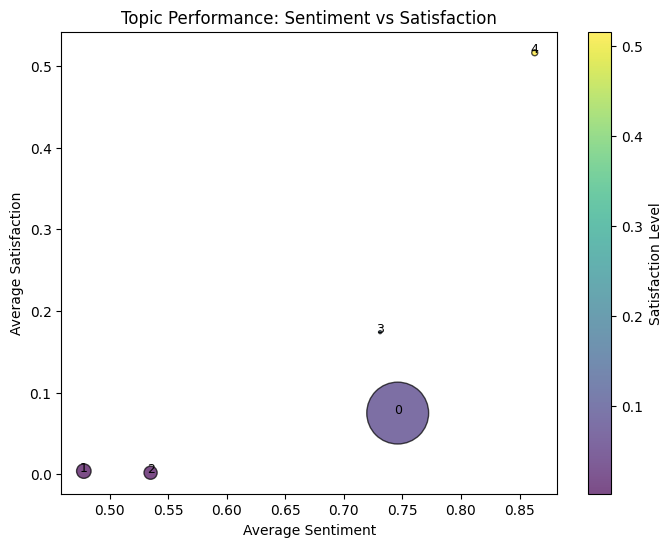

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(topic_perf["avg_sentiment"], topic_perf["avg_satisfaction"],
            s=topic_perf["message_count"]/5,  # bubble size by message count
            c=topic_perf["avg_satisfaction"], cmap="viridis", alpha=0.7, edgecolors="k")

for i, row in topic_perf.iterrows():
    plt.text(row["avg_sentiment"], row["avg_satisfaction"], str(row["cluster"]), fontsize=9, ha="center")

plt.title("Topic Performance: Sentiment vs Satisfaction")
plt.xlabel("Average Sentiment")
plt.ylabel("Average Satisfaction")
plt.colorbar(label="Satisfaction Level")
plt.show()


In [8]:
topic_perf.to_csv("cleaned_data/topic_performance.csv", index=False)
print("✅ topic_performance.csv saved successfully!")


✅ topic_performance.csv saved successfully!
